<a href="https://colab.research.google.com/github/bhende27/Multi-Class-News-Classification/blob/master/News_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

print(tf.__version__)

2.3.0


In [ ]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [ ]:
articles = []
labels = []

with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


In [ ]:
sum([len(y) for y in articles])

3652193

In [ ]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'also': 6,
 'mr': 3,
 'new': 8,
 'one': 10,
 'people': 7,
 'said': 2,
 'us': 9,
 'would': 4,
 'year': 5}

In [ ]:
len(set(word_index.keys()))

27270

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

In [ ]:

print(train_sequences[0])
len(train_sequences[0])

[91, 160, 1141, 1106, 49, 979, 755, 1, 89, 1304, 4288, 129, 175, 3653, 1214, 1194, 1578, 42, 7, 893, 91, 1, 334, 85, 20, 14, 130, 3261, 1215, 2421, 570, 451, 1376, 58, 3378, 3521, 1661, 8, 921, 730, 10, 844, 1, 9, 598, 1579, 1107, 395, 1940, 1106, 731, 49, 538, 1398, 2010, 1624, 134, 249, 113, 2355, 795, 4980, 980, 584, 10, 3956, 3957, 921, 2562, 129, 344, 175, 3653, 1, 1, 39, 62, 2866, 28, 9, 4723, 18, 1305, 136, 416, 7, 143, 1423, 71, 4501, 436, 4981, 91, 1107, 77, 1, 82, 2011, 53, 1, 91, 6, 1008, 601, 89, 1304, 91, 1962, 131, 137, 420, 9, 2867, 38, 152, 1234, 89, 1304, 4724, 7, 436, 4981, 3153, 6, 2492, 1, 431, 1126, 1, 1424, 571, 1216, 1902, 1, 766, 9, 538, 1398, 2010, 134, 2068, 400, 845, 1963, 1601, 34, 1717, 2868, 1, 1, 2422, 244, 9, 2624, 82, 732, 6, 1172, 1195, 152, 720, 591, 1, 124, 28, 1305, 1690, 432, 83, 933, 115, 20, 14, 18, 3154, 1, 37, 1484, 1, 23, 37, 87, 335, 2356, 37, 467, 255, 1963, 1359, 328, 1, 299, 732, 1173, 18, 2869, 1717, 1, 294, 756, 1074, 395, 2012, 387, 431

425

In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
# print(len(train_sequences[0]))
# print(len(train_padded[0]))

# print(len(train_sequences[1]))
# print(len(train_padded[1]))

# print(len(train_sequences[10]))
# print(len(train_padded[10]))
print(len(train_sequences))       #train sequence is a list of sequences
print(len(train_padded))          #train_padded in numpy 2D array

1780
1780


In [ ]:
len(train_sequences[0])

425

In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


In [ ]:
#looking at the labels
print(set(labels))

{'sport', 'politics', 'entertainment', 'business', 'tech'}


In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))


In [ ]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin <OOV> anti nazi film german movie anti nazi <OOV> <OOV> drawn <OOV> <OOV> berlin film festival <OOV> <OOV> final days <OOV> final days member white rose movement <OOV> 21 arrested <OOV> brother hans <OOV> <OOV> <OOV> <OOV> <OOV> tyranny <OOV> <OOV> director marc <OOV> said feeling responsibility keep legacy <OOV> going must <OOV> keep ideas alive added film drew <OOV> <OOV> <OOV> <OOV> trial <OOV> <OOV> <OOV> east germany secret police discovery <OOV> behind film <OOV> worked closely <OOV> relatives including one <OOV> sisters ensure historical <OOV> film <OOV> members white rose <OOV> group first started <OOV> anti nazi <OOV> summer <OOV> arrested dropped <OOV> munich university calling day <OOV> <OOV> <OOV> regime film <OOV> six days <OOV> arrest intense trial saw <OOV> initially deny charges ended <OOV> appearance one three german films <OOV> top prize festival south african film version <OOV> <OOV> opera <OOV> shot <OOV> town <OOV> language also <OOV> berlin festival film en

In [ ]:

model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(set(labels))

{'politics', 'entertainment', 'business', 'tech', 'sport'}


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, 
                    validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
56/56 - 10s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3159 - val_accuracy: 0.9393
Epoch 2/10
56/56 - 10s - loss: 7.1729e-04 - accuracy: 1.0000 - val_loss: 0.3472 - val_accuracy: 0.9348
Epoch 3/10
56/56 - 10s - loss: 5.4291e-04 - accuracy: 1.0000 - val_loss: 0.3403 - val_accuracy: 0.9348
Epoch 4/10
56/56 - 11s - loss: 4.3043e-04 - accuracy: 1.0000 - val_loss: 0.3503 - val_accuracy: 0.9371
Epoch 5/10
56/56 - 10s - loss: 3.5566e-04 - accuracy: 1.0000 - val_loss: 0.3620 - val_accuracy: 0.9348
Epoch 6/10
56/56 - 15s - loss: 3.0222e-04 - accuracy: 1.0000 - val_loss: 0.3586 - val_accuracy: 0.9348
Epoch 7/10
56/56 - 10s - loss: 2.5870e-04 - accuracy: 1.0000 - val_loss: 0.3703 - val_accuracy: 0.9393
Epoch 8/10
56/56 - 10s - loss: 2.2483e-04 - accuracy: 1.0000 - val_loss: 0.3800 - val_accuracy: 0.9348
Epoch 9/10
56/56 - 10s - loss: 1.9553e-04 - accuracy: 1.0000 - val_loss: 0.3883 - val_accuracy: 0.9348
Epoch 10/10
56/56 - 10s - loss: 1.7158e-04 - accuracy: 1.0000 - val_loss: 0.3

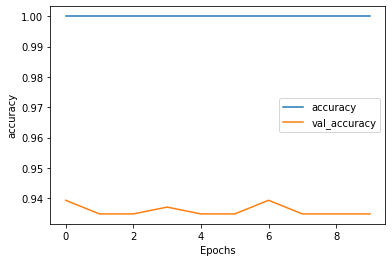

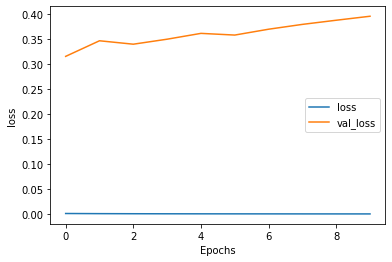

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
txt = ["A WeWork shareholder has taken the company to court over the near-$1.7bn (£1.3bn) leaving package approved for ousted co-founder Adam Neumann."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['sport', 'politics', 'entertainment', 'business', 'tech']
print(pred, labels[np.argmax(pred)])

[[1.6900460e-06 4.6619698e-05 1.6917273e-05 9.9956661e-01 1.1282553e-06
  3.6710661e-04]] business
